In [198]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import numpy as np

In [199]:
Lactoferrin = Chem.MolFromSmiles('CC[C@H](C)[C@@H](C(=N[C@@H]([C@@H](C)O)C(=N[C@@H](CS)\
C(=N[C@@H](C(C)C)C(=N[C@@H](CCCNC(=N)N)C(=N[C@@H](CCCNC(=N)N)C(=N[C@@H](C)C(=N[C@@H](CC1=CC=CC=C1)\
C(=O)O)O)O)O)O)O)O)O)N=C([C@H](CO)N=C([C@@H]2CCCN2C(=O)[C@H](C)N=C(CN=C([C@H](CC(C)C)N=C([C@H](CCCCN)\
N=C([C@H](CCCCN)N=C([C@H](CCSC)N=C([C@H](CCCNC(=N)N)N=C([C@H](CC3=CNC4=CC=CC=C43)N=C([C@H](CCC(=N)O)\
N=C([C@H](CC5=CNC6=CC=CC=C65)N=C([C@H](CCCNC(=N)N)N=C([C@H](CCCNC(=N)N)N=C([C@H](CS)N=C([C@H](CCCCN)\
N=C([C@H](CC7=CC=CC=C7)N)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O')

Lactoferrin C₁₄₁H₂₂₆N₄₆O₂₉S₃


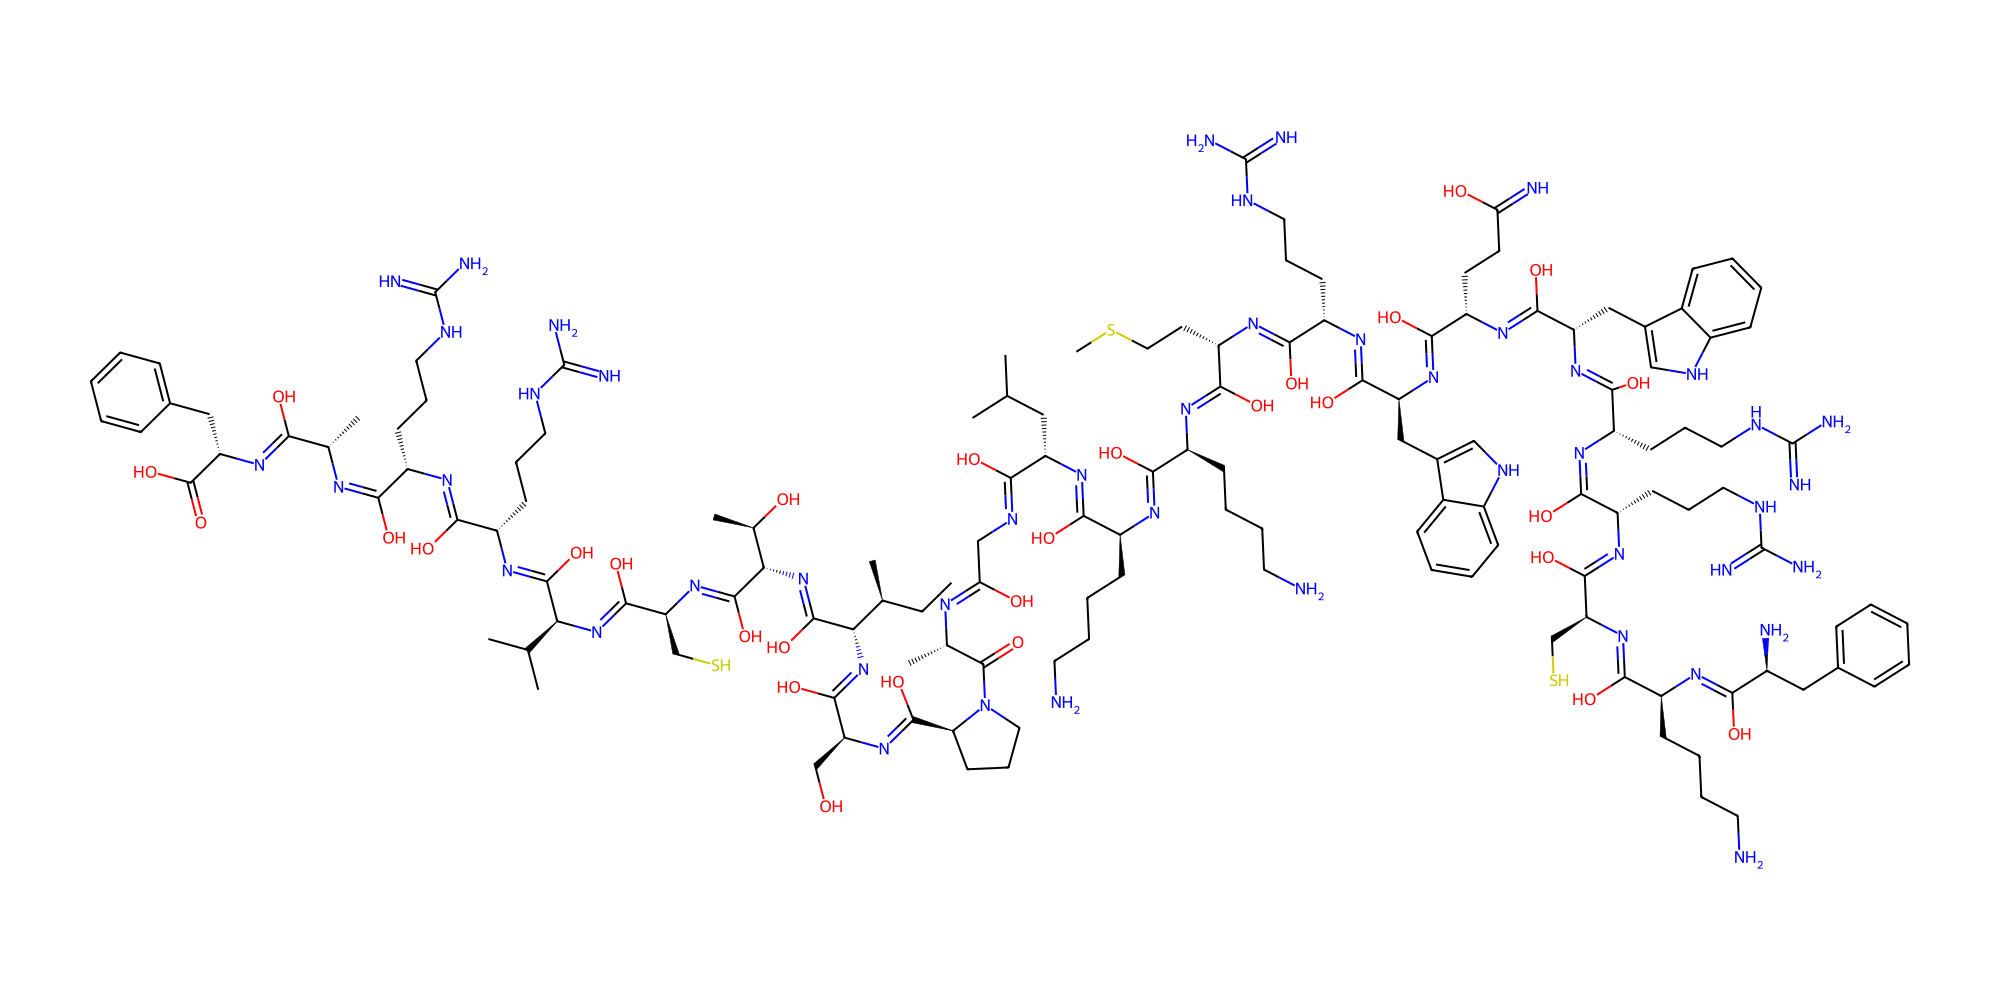

In [200]:
img = Draw.MolToImage(Lactoferrin,size=(2000, 1000))
print(f"Lactoferrin C\u2081\u2084\u2081H\u2082\u2082\u2086N\u2084\u2086O\u2082\u2089S\u2083")
img

In [201]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(Lactoferrin, 2, nBits=1024, bitInfo =bi)   #the array will have a length of 1024
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
prints = [(Lactoferrin,x,bi) for x in fp.GetOnBits()]
print(len(list(fp.GetOnBits())))
fp_arr[0:200]

135


array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

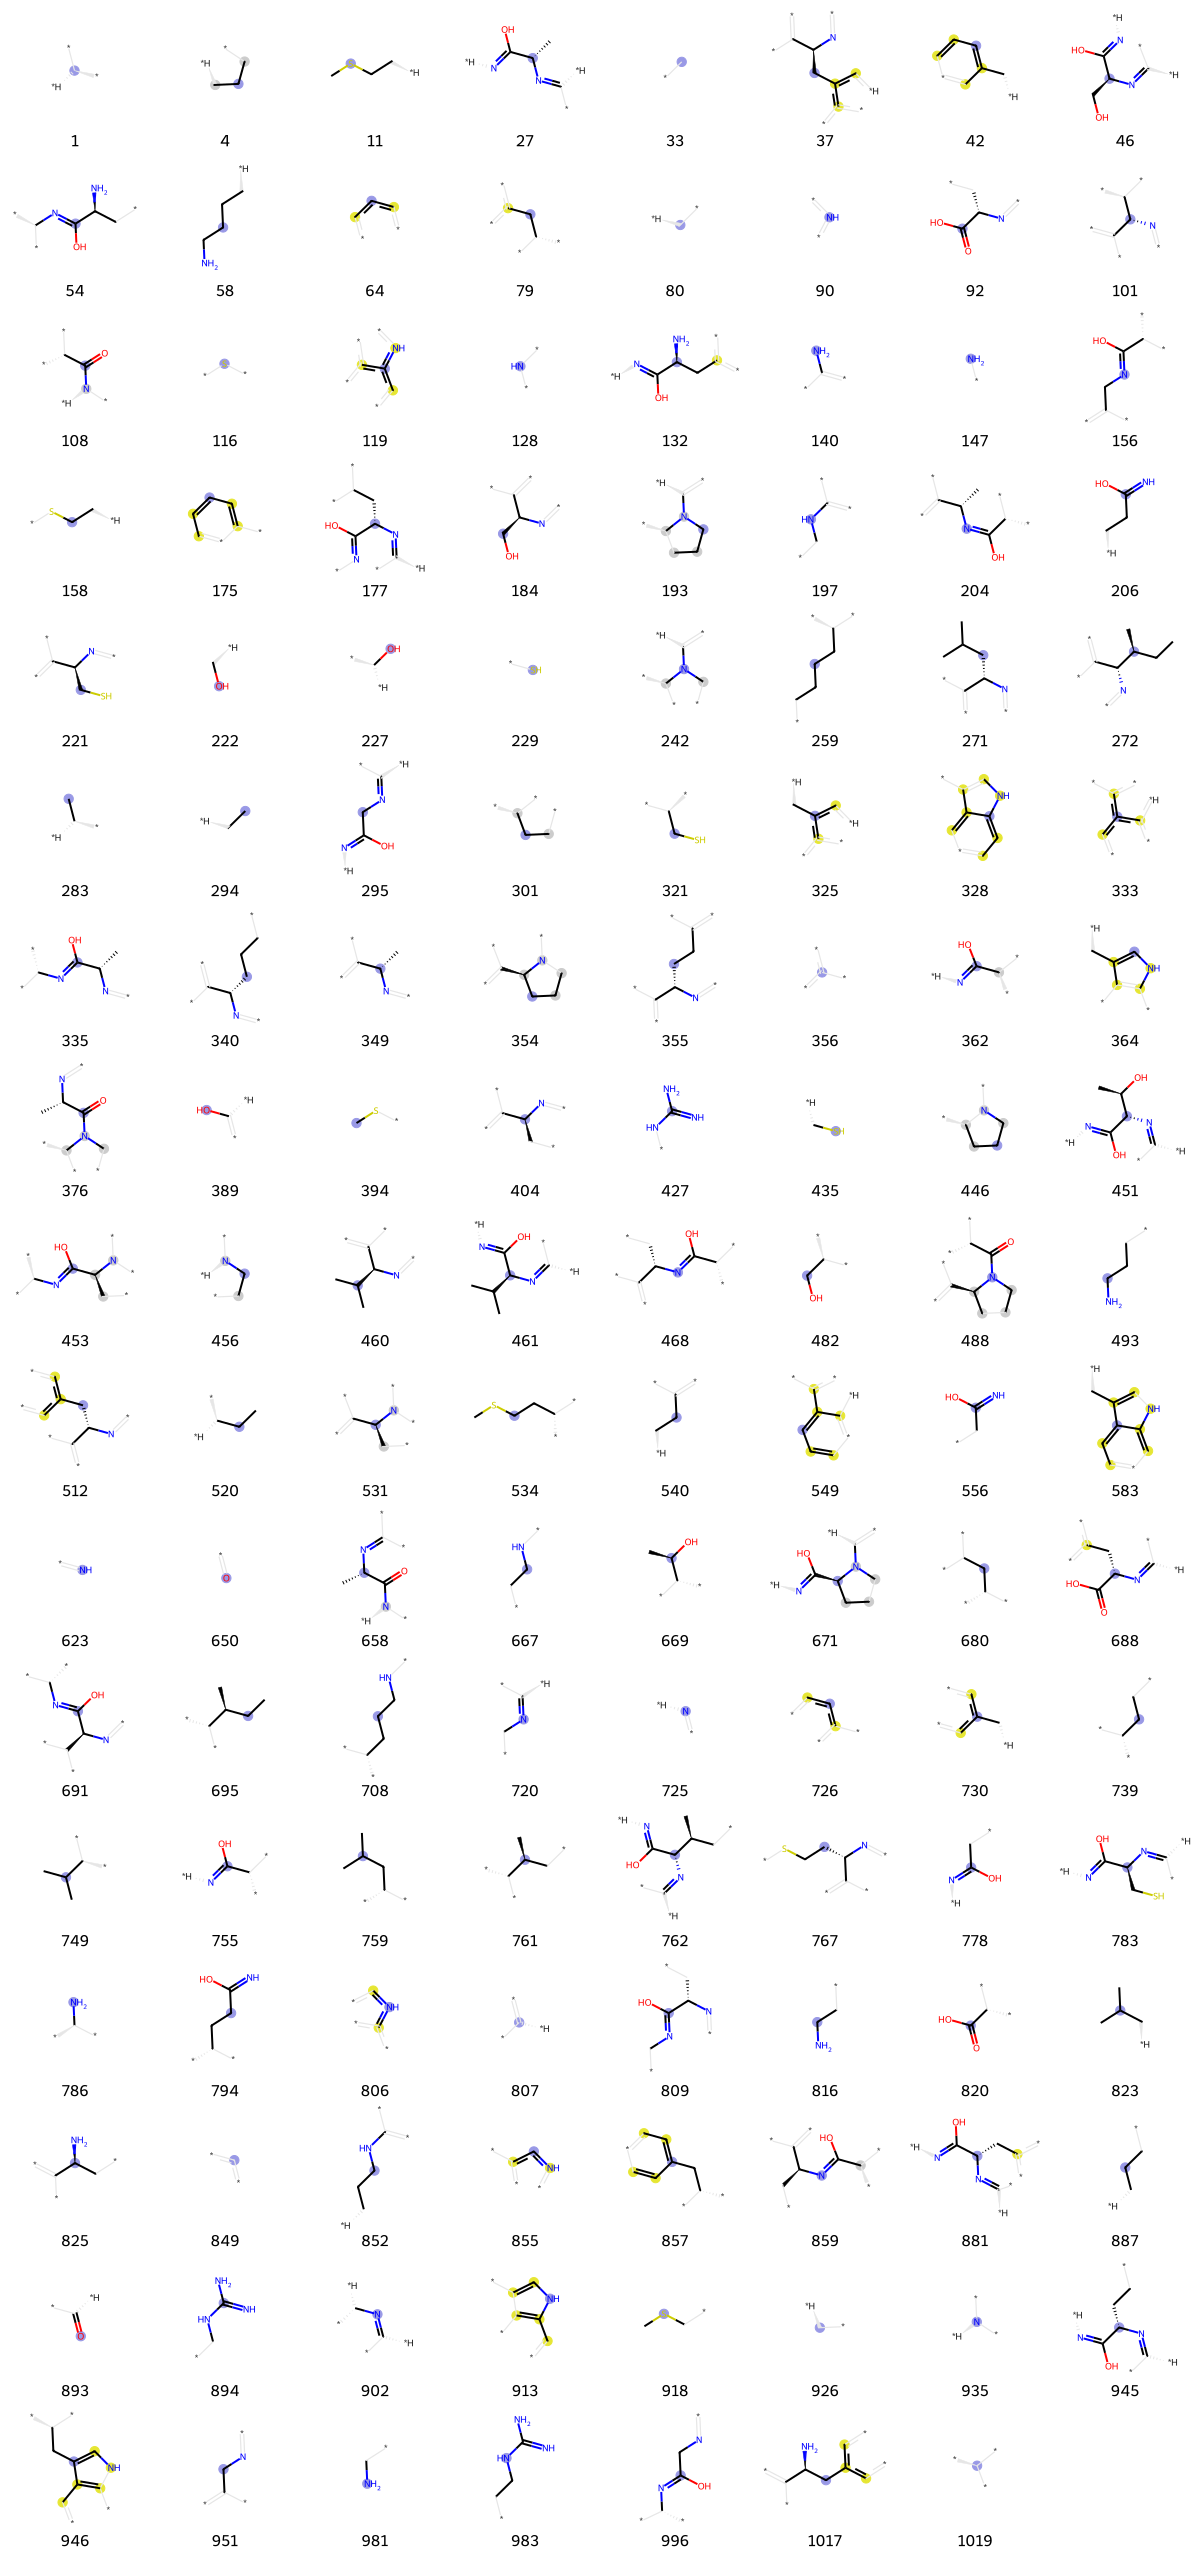

In [202]:
Draw.DrawMorganBits(prints, molsPerRow=8, legends=[str(x) for x in fp.GetOnBits()])

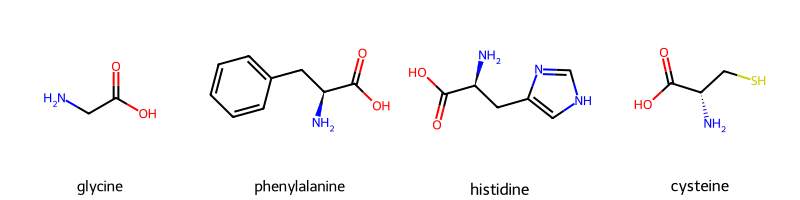

In [203]:
### Fingerprints

smiles_list = ['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S' ]
names =  ['glycine', 'phenylalanine', 'histidine', 'cysteine']
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=len(mol_list), legends = [str(x) for x in names])
img

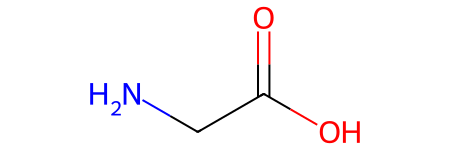

In [208]:
glycine = mol_list[0]
glycine

In [230]:
bi = {}  #a dictionary to store the bit information

fp_glycine = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo =bi)   #the array will have a length of 1024
fp_glycine_arr = np.zeros(1) 
DataStructs.ConvertToNumpyArray(fp_glycine, fp_glycine_arr)
print(fp_glycine_arr)
print(np.nonzero(fp_glycine_arr))
list(fp_glycine.GetOnBits()) #Convert the above to a list 

[0. 0. 0. ... 0. 0. 0.]
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981], dtype=int64),)


[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

In [245]:
prints = [(glycine,x,bi) for x in fp_glycine.GetOnBits()]
prints

[(<rdkit.Chem.rdchem.Mol at 0x2b300f89ee0>,
  27,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x2b300f89ee0>,
  80,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x2b300f89ee0>,
  147,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x2b300f89ee0>,
  389,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.C

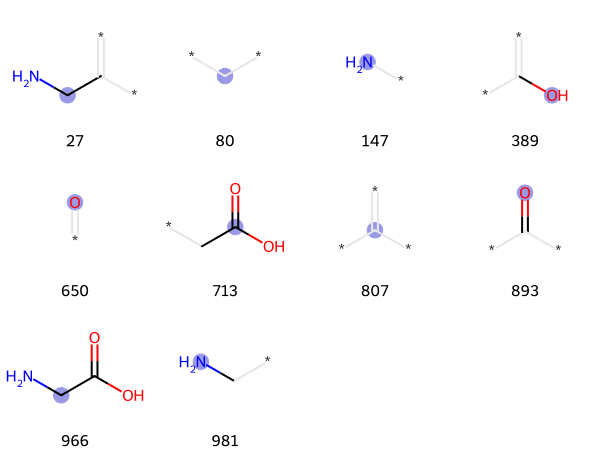

In [247]:
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp_glycine.GetOnBits()])

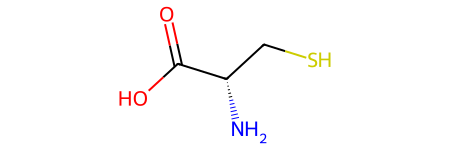

In [233]:
### Compare cysteine to gycine to see how similar they are 

cysteine = mol_list[3]
cysteine

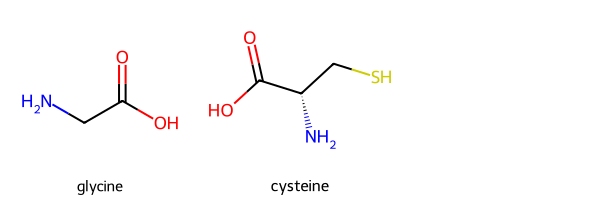

In [234]:
img = Draw.MolsToGridImage([glycine, cysteine], legends =["glycine", "cysteine"])
img

In [236]:
fp_cysteine = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo={})  ##fingerprints for cycteine
list(fp_cysteine.GetOnBits())

[1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]

In [238]:
print(list(fp_glycine.GetOnBits()))    #On-bits of glycine fingerprints
list(fp_cysteine.GetOnBits())          #On-bits of cycteine fingerprints

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


[1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]

In [242]:
#To identify the fingerprints that are common to them
#Convert the data type to sets

common = set(fp_glycine.GetOnBits()) & set(fp_cysteine.GetOnBits()) 
print(common)
combined = set(fp_glycine.GetOnBits()) | set(fp_cysteine.GetOnBits()) 
print(combined)

{389, 807, 650, 80, 147, 893}
{1, 321, 389, 966, 902, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}


In [244]:
similarity_score = print(len(common)/len(combined))

## To know how similar the molecules are
print(DataStructs.TanimotoSimilarity(fp_glycine,fp_cysteine))  #It takes in the two fingerprints

0.3
0.3
